In [1]:
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import numpy as np
import nengo
import math

In [124]:


'''
This script aims to visualize the probability mass function, f(theta,x), of a neuron given its tuning curve.
This is a step towards computing the Fisher info conditioned on x.
'''

# resources:
# https://towardsdatascience.com/an-intuitive-look-at-fisher-information-2720c40867d8
# https://en.wikipedia.org/wiki/Fisher_information

model = nengo.Network()
with model:
    ens = nengo.Ensemble(n_neurons = 10, 
                            dimensions = 1, 
                            neuron_type = nengo.Sigmoid(tau_ref = 0.0025),
                            seed = 1, 
                            #intercepts = nengo.dists.CosineSimilarity(500),
                            max_rates = nengo.dists.Uniform(350, 400),
                            
                        )
sim = nengo.Simulator(model)

# theta: real-world value being represented
# X: activity matrix
theta, X = nengo.utils.ensemble.tuning_curves(ens, sim)
theta = theta.T[0]


x_vals = np.linspace(-100, 300, 100)


Is = []


for neuron in range(X.shape[1]):

    # sigma is selected as 10% of the maximum firing rate
    #x_max = X[:,neuron].max()
    #x_min = X[:,neuron].min()
    #x_norm = ( X[:,neuron] - x_min ) / ( x_max - x_min )
    sigma = 400*0.1
    
    pmf = np.zeros( (len(x_vals),len(theta)) )
    
    # theta is real-world valued stimulus
    for j,theta_ in enumerate(theta):
        
        # x is observed firing rate
        for i,x_ in enumerate(x_vals):
            x_mean = X[j,neuron]
            pmf[i,j] = ( 1 / ( sigma * np.sqrt( 2 * math.pi ) ) ) * math.exp( - ( x_mean - x_ )**2 / ( 2 * sigma**2 ) )
            
    g1, g2 = np.gradient(pmf)
    I = np.sum(((g2/pmf)**2)*pmf,axis=0)
    Is.append(I)
        
    '''
    fig,(ax1,ax2,cax) = plt.subplots(1,3,
                                    figsize = (9,4),
                                    gridspec_kw = {'width_ratios' : [15,15,1]}
                                    )
    ax1.plot(theta, X[:,neuron], color = 'dimgray')
    ax1.fill_between(theta, X[:,neuron] - sigma, X[:,neuron] + sigma, color = 'dimgray', alpha = 0.5)
    
    im = ax2.imshow(pmf[::-1,:],aspect='auto', extent=(theta[0], theta[-1], x_vals[0], x_vals[-1]))#,norm=LogNorm(vmin = 1e-16, vmax = 100))
    ax2.set_xlabel(r'Stimulus $\theta$')
    #xticks = [0,25,50]
    #xticklabels = [round(t,1) for t in np.linspace(-1,1,len(xticks))]
    #ax2.set_xticks(xticks)
    #ax2.set_xticklabels(xticklabels)
    
    #yticks = [0,50]
    #yticklabels = [round(t,1) for t in np.linspace(0,1,len(yticks))]
    #x2.set_yticks(yticks)
    #ax2.set_yticklabels(yticklabels)
    ax2.set_ylabel(r'norm. Firing rate $X$')
    
    cbar = fig.colorbar(im, cax = cax)
    cbar.set_label('Probability',va='top',ha='left',rotation=90,in_layout=True)
    # cbar.ax.set_yticklabels(ticks)
    
    fig.tight_layout()
    plt.show()
    '''

# notes
# Why does the heatmap appear transposed?

# pmf being populated correctly
# pmf being plotted corrected - test: pmf[i,j] = 5*i + j; gradient along i (rows/y-drection) steeper than along j (cols/x-direction)
# theta_ (stim) and x_ (firing rate) are being read out properly
# equation is wrong?


HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

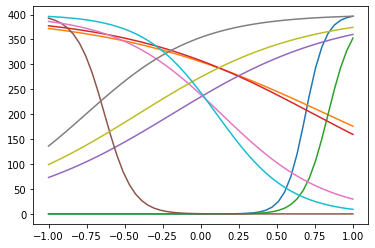

In [125]:
plt.plot(theta, X)

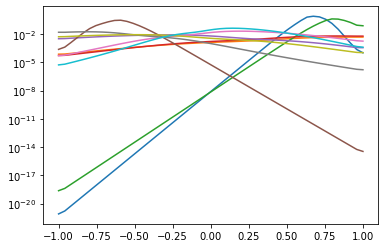

In [128]:
Is = np.array(Is)
norm_Is = Is / np.linalg.norm(Is, axis=1)[:,None]

plt.semilogy(theta, np.array(Is).T);

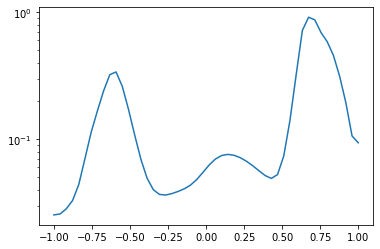

In [129]:
plt.semilogy(theta, np.sum(np.array(Is).T, axis=1));

In [51]:
g1, g2 = np.gradient(pmf)

In [59]:
I = np.sum((g2/pmf)**2*pmf,axis=0)

In [60]:
I.shape

(50,)

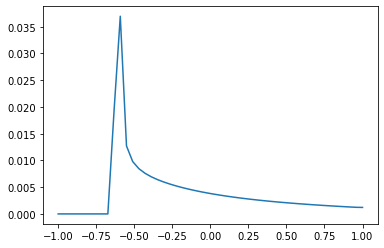

In [61]:
plt.plot(theta, I)